In [1]:
import pandas as pd
import sys
print(sys.version_info)

df = pd.read_csv("train.csv")


sys.version_info(major=3, minor=9, micro=0, releaselevel='final', serial=0)


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


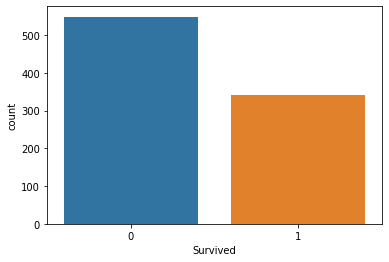

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot('Survived',data=df)

a = df.groupby(['Survived','Sex'])['Survived'].count()

pd.crosstab([df.Sex,df.Pclass],df.Survived,margins=True).style.background_gradient(cmap='summer_r')

/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

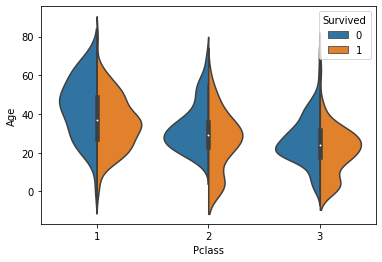

In [5]:

sns.violinplot('Pclass','Age',hue='Survived',data=df,split=True)

In [3]:
df['Initial']=0
df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

initial_crosstab= pd.crosstab(df.Sex, df.Initial)


In [4]:
df['Initial'].replace(initial_crosstab.columns, ['Other','Other','Other','Other','Other','Other',
                                   'Miss','Other','Master','Miss','Other','Other','Mr','Mrs','Mrs','Other','Mr'],inplace=True)
df.groupby(['Initial'])['Age'].mean()


Initial
Master     4.574167
Miss      21.952381
Mr        32.409774
Mrs       35.825688
Other     42.478261
Name: Age, dtype: float64

In [5]:
df.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [6]:
df['Embarked'].unique()
df.loc[df['Embarked'].isnull(),'Embarked']='S'

In [7]:
null_idx = pd.isnull(df.Age)
df.loc[null_idx & (df.Initial == 'Master'),'Age'] = 5
df.loc[null_idx & (df.Initial == 'Miss'),'Age'] = 22
df.loc[null_idx & (df.Initial == 'Mr'),'Age'] = 32
df.loc[null_idx & (df.Initial == 'Mrs'),'Age'] = 35
df.loc[null_idx & (df.Initial == 'Other'),'Age'] = 42
df.Age.isnull().sum()

In [9]:
from sklearn.preprocessing import LabelEncoder
label = ['Sex','Initial','Embarked']
le = LabelEncoder()

df["Sex"] = le.fit_transform(df['Sex'])
df["Initial"] = le.fit_transform(df['Initial'])
df["Embarked"] = le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2


0

<AxesSubplot:>

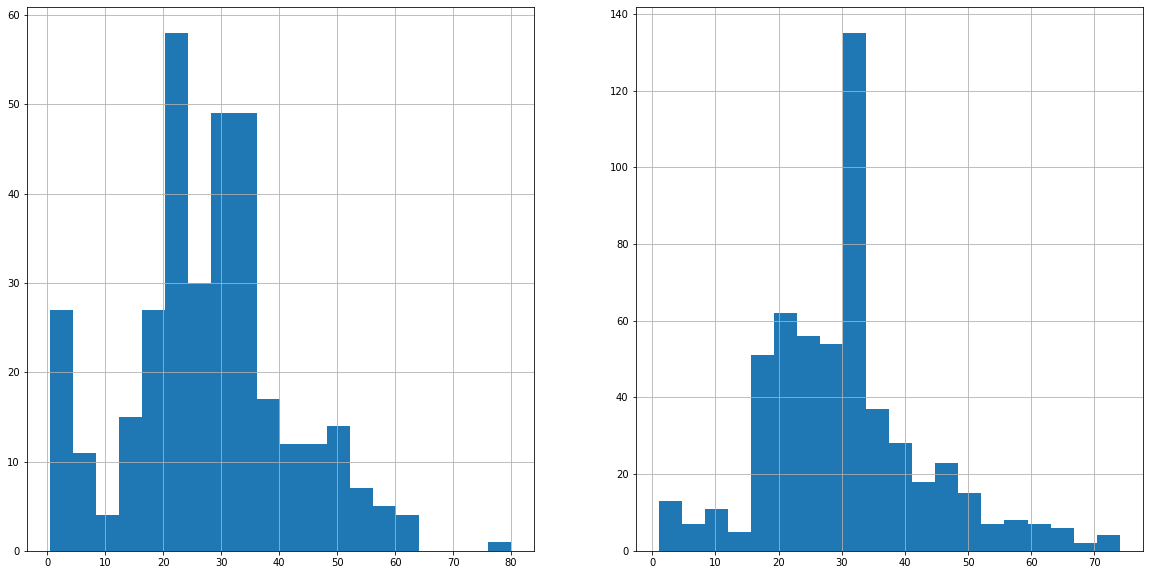

In [103]:
f,ax = plt.subplots(1,2,figsize=(20,10))
df[df.Survived==1].Age.hist(ax=ax[0],bins=20)
df[df.Survived==0].Age.hist(ax=ax[1],bins=20)

/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


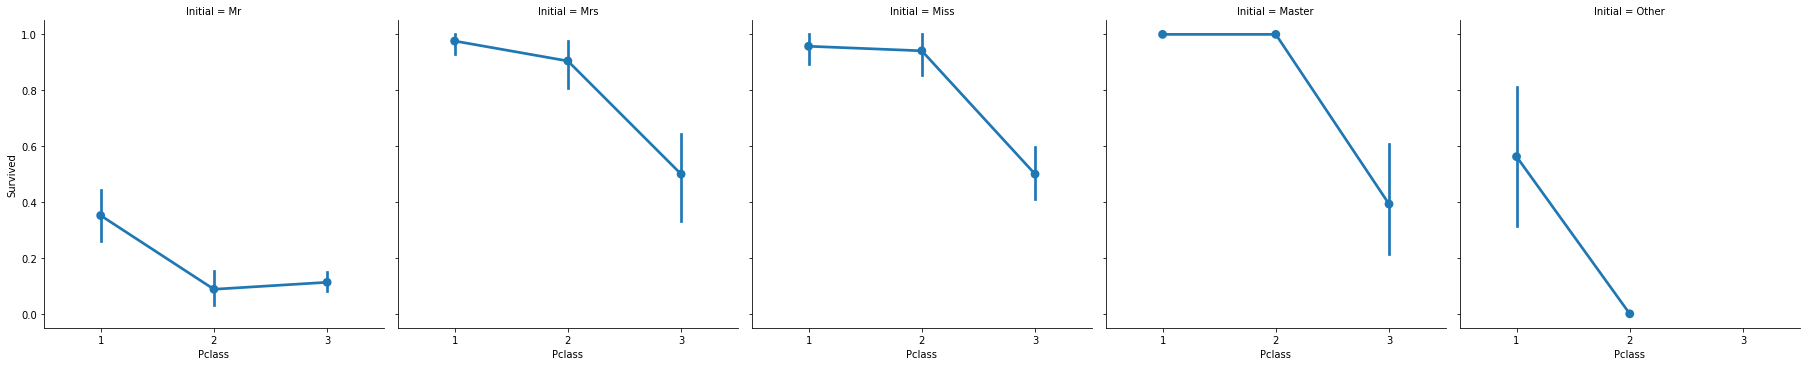

In [104]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)
plt.show()

In [105]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [107]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

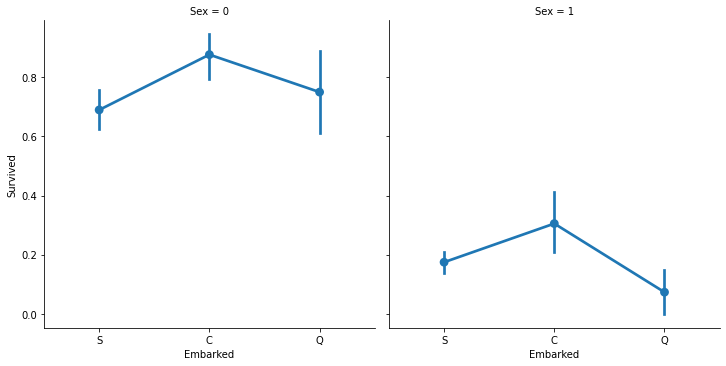

In [109]:
sns.factorplot('Embarked','Survived',col='Sex',data=df)
plt.show()

/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

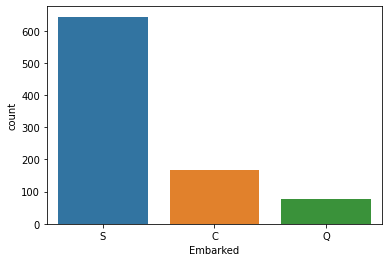

In [112]:
sns.countplot('Embarked',data=df)

In [114]:
df['Embarked'].fillna('S',inplace=True)

In [117]:
pd.crosstab(df.SibSp,df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [13]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4
df['Age_band'].value_counts().to_frame()

,Age_band
1,501
2,206
0,104
3,69
4,11


/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-package

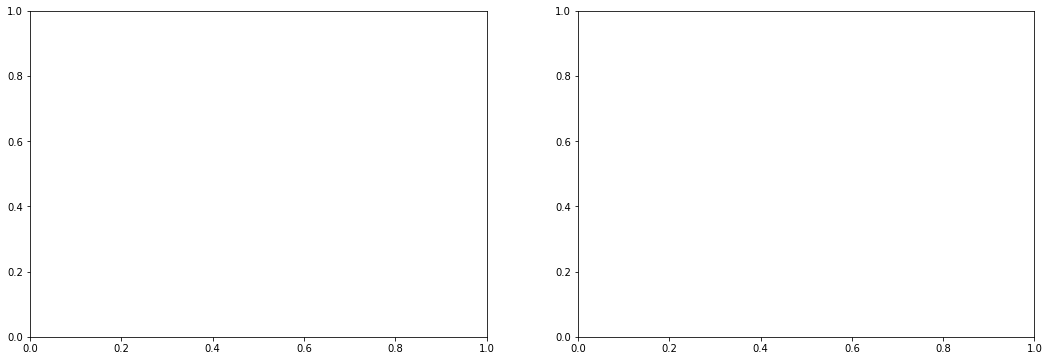

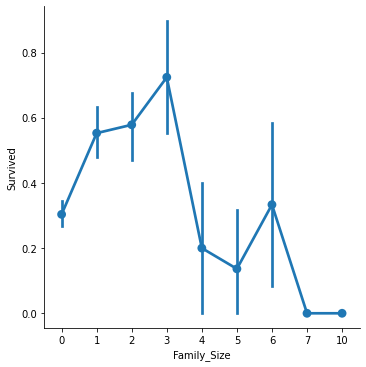

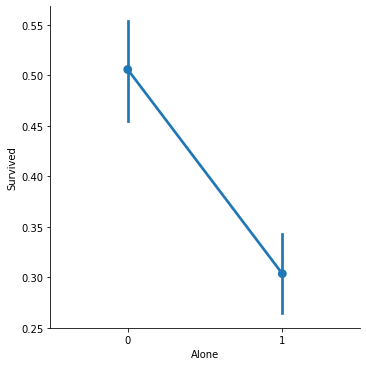

In [18]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']#family size
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=df,ax=ax[0])
sns.factorplot('Alone','Survived',data=df,ax=ax[1])



/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


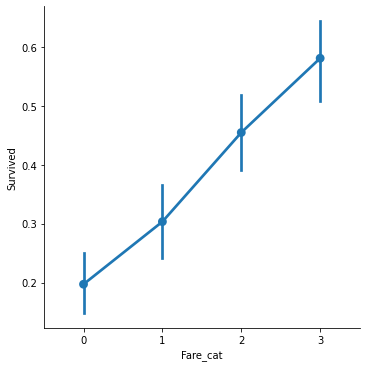

In [25]:
df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

le = LabelEncoder()
df['Fare_cat'] = le.fit_transform(df['Fare_Range'])
df[['Fare_Range','Fare_cat']].value_counts()
sns.factorplot('Fare_cat','Survived',data=df)

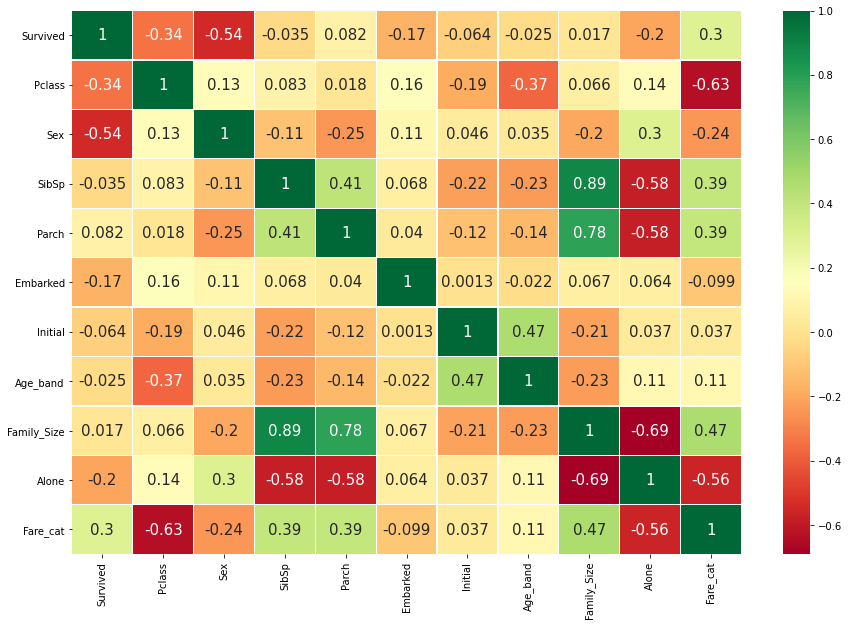

In [30]:
#df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [34]:
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Survived']

In [53]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
model.print_summary()

The accuracy of the Logistic Regression is 0.7873134328358209


/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AttributeError: 'LogisticRegression' object has no attribute 'print_summary'

In [45]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))
#y_prob= model.predict_proba(test_X)
#y_prob.round(2)


The accuracy of the NaiveBayes is 0.7910447761194029


/Users/jialu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

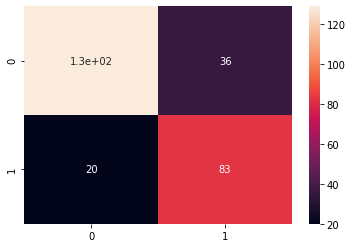

In [51]:
sns.heatmap(confusion_matrix( test_Y,prediction6),annot=True)

268